In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

Let's start by loading a local MOC and plotting it

In [2]:
from mocpy import MOC

m1 = MOC.from_fits('demo-data/P-SDSS9-r.fits')

Now, we load MOC for GALEX GR6 AIS FUV:

In [3]:
m2 = MOC.from_fits('demo-data/P-GALEXGR6-AIS-FUV.fits')

In [4]:
# Init a simple WCS
from hips import WCSGeometry
from astropy.coordinates import SkyCoord

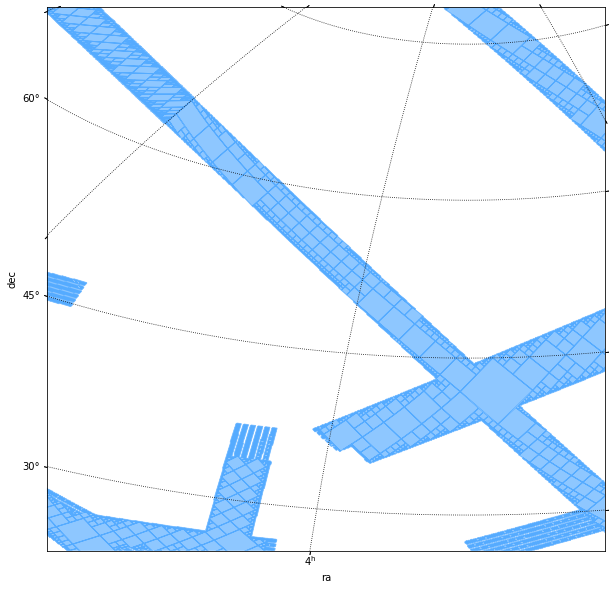

In [9]:
fig = plt.figure(111, figsize=(10, 10))
# Get the size of the figure in pixels
width_px, height_px = fig.get_size_inches()*fig.dpi

geometry = WCSGeometry.create(
 skydir=SkyCoord(50, 50, unit='deg', frame='icrs'),
 width=width_px, height=height_px, fov="50 deg",
 coordsys='icrs', projection='AIT')
wcs = geometry.wcs
ax = fig.add_subplot(1, 1, 1, projection=wcs)

# Compute the bounding box vertices
c1 = wcs.wcs.crval + wcs.wcs.crpix * wcs.wcs.cdelt
c2 = wcs.wcs.crval - wcs.wcs.crpix * wcs.wcs.cdelt
# Add all the MOC to the view

m1.fill(ax=ax, wcs=wcs, lon1=c1[0]*u.deg, lat1=c1[1]*u.deg, lon2=c2[0]*u.deg, lat2=c2[1]*u.deg, alpha=0.5, fill=True, color="dodgerblue")
#moc.border(ax=ax, wcs=wcs, color='black')

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

We can compute the intersection between the 2 MOC:

In [ ]:
m_intersect = m1.intersection(m2)

plot(mocs=[m_intersect], wcs=wcs_icrs, colors=['g'], title="P-GALEXGR6-AIS-FUV inter P-SDSS9-r")

And serialize it to FITS (official serialization):

In [ ]:
hdulist = m_intersect.serialize(format='json')
hdulist

MOC can also be serialized in JSON:
```python
m_intersect.write(format='json')
```

Or write it directly to a FITS/JSON file:
```python
m_intersect.write(path=<filename>, write_to_file=True, format='json'/'fits')
```